# Census Income Project


Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.


Description of fnlwgt (final weight):


The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



# Importing Required Libraries

In [24]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df_n=pd.read_csv('census_income.csv')

In [3]:
df_n

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df_n.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Exploratory Data Analysis

In [5]:
df_n.info

<bound method DataFrame.info of        Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   

In [6]:
df_n['Race'].value_counts

<bound method IndexOpsMixin.value_counts of 0         White
1         White
2         Black
3         Black
4         White
          ...  
32555     White
32556     White
32557     White
32558     White
32559     White
Name: Race, Length: 32560, dtype: object>

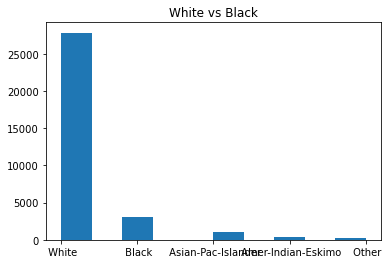

In [7]:
df_n['Race'].hist(grid=False)
plt.title('White vs Black')
plt.show()

In [8]:
df1=df_n.drop(['Age','Workclass','Education','Education_num','Marital_status','Occupation',
               'Relationship','Race','Sex','Native_country'],axis=1)

In [9]:
df1

,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Income
0,83311,0,0,13,<=50K
1,215646,0,0,40,<=50K
2,234721,0,0,40,<=50K
3,338409,0,0,40,<=50K
4,284582,0,0,40,<=50K
...,...,...,...,...,...
32555,257302,0,0,38,<=50K
32556,154374,0,0,40,>50K
32557,151910,0,0,40,<=50K
32558,201490,0,0,20,<=50K


In [10]:
df1['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [13]:
df1['Income'].astype('category')

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: Income, Length: 32560, dtype: category
Categories (2, object): [' <=50K', ' >50K']

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()
df1['Income']=le.fit_transform(df1['Income'])

In [16]:
df1['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [17]:
df1.head()

,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Income
0,83311,0,0,13,0
1,215646,0,0,40,0
2,234721,0,0,40,0
3,338409,0,0,40,0
4,284582,0,0,40,0


In [18]:
df1.tail()

,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Income
32555,257302,0,0,38,0
32556,154374,0,0,40,1
32557,151910,0,0,40,0
32558,201490,0,0,20,0
32559,287927,15024,0,40,1


In [19]:
df1.sample()

,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Income
19652,32779,0,419,12,0


# Checking Correlation

In [21]:
df1.corr()

,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Income
Fnlwgt,1.000000,0.000437,-0.010259,-0.018770,-0.009481
Capital_gain,0.000437,1.000000,-0.031614,0.078409,0.223333
Capital_loss,-0.010259,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,-0.018770,0.078409,0.054256,1.000000,0.229690
Income,-0.009481,0.223333,0.150523,0.229690,1.000000


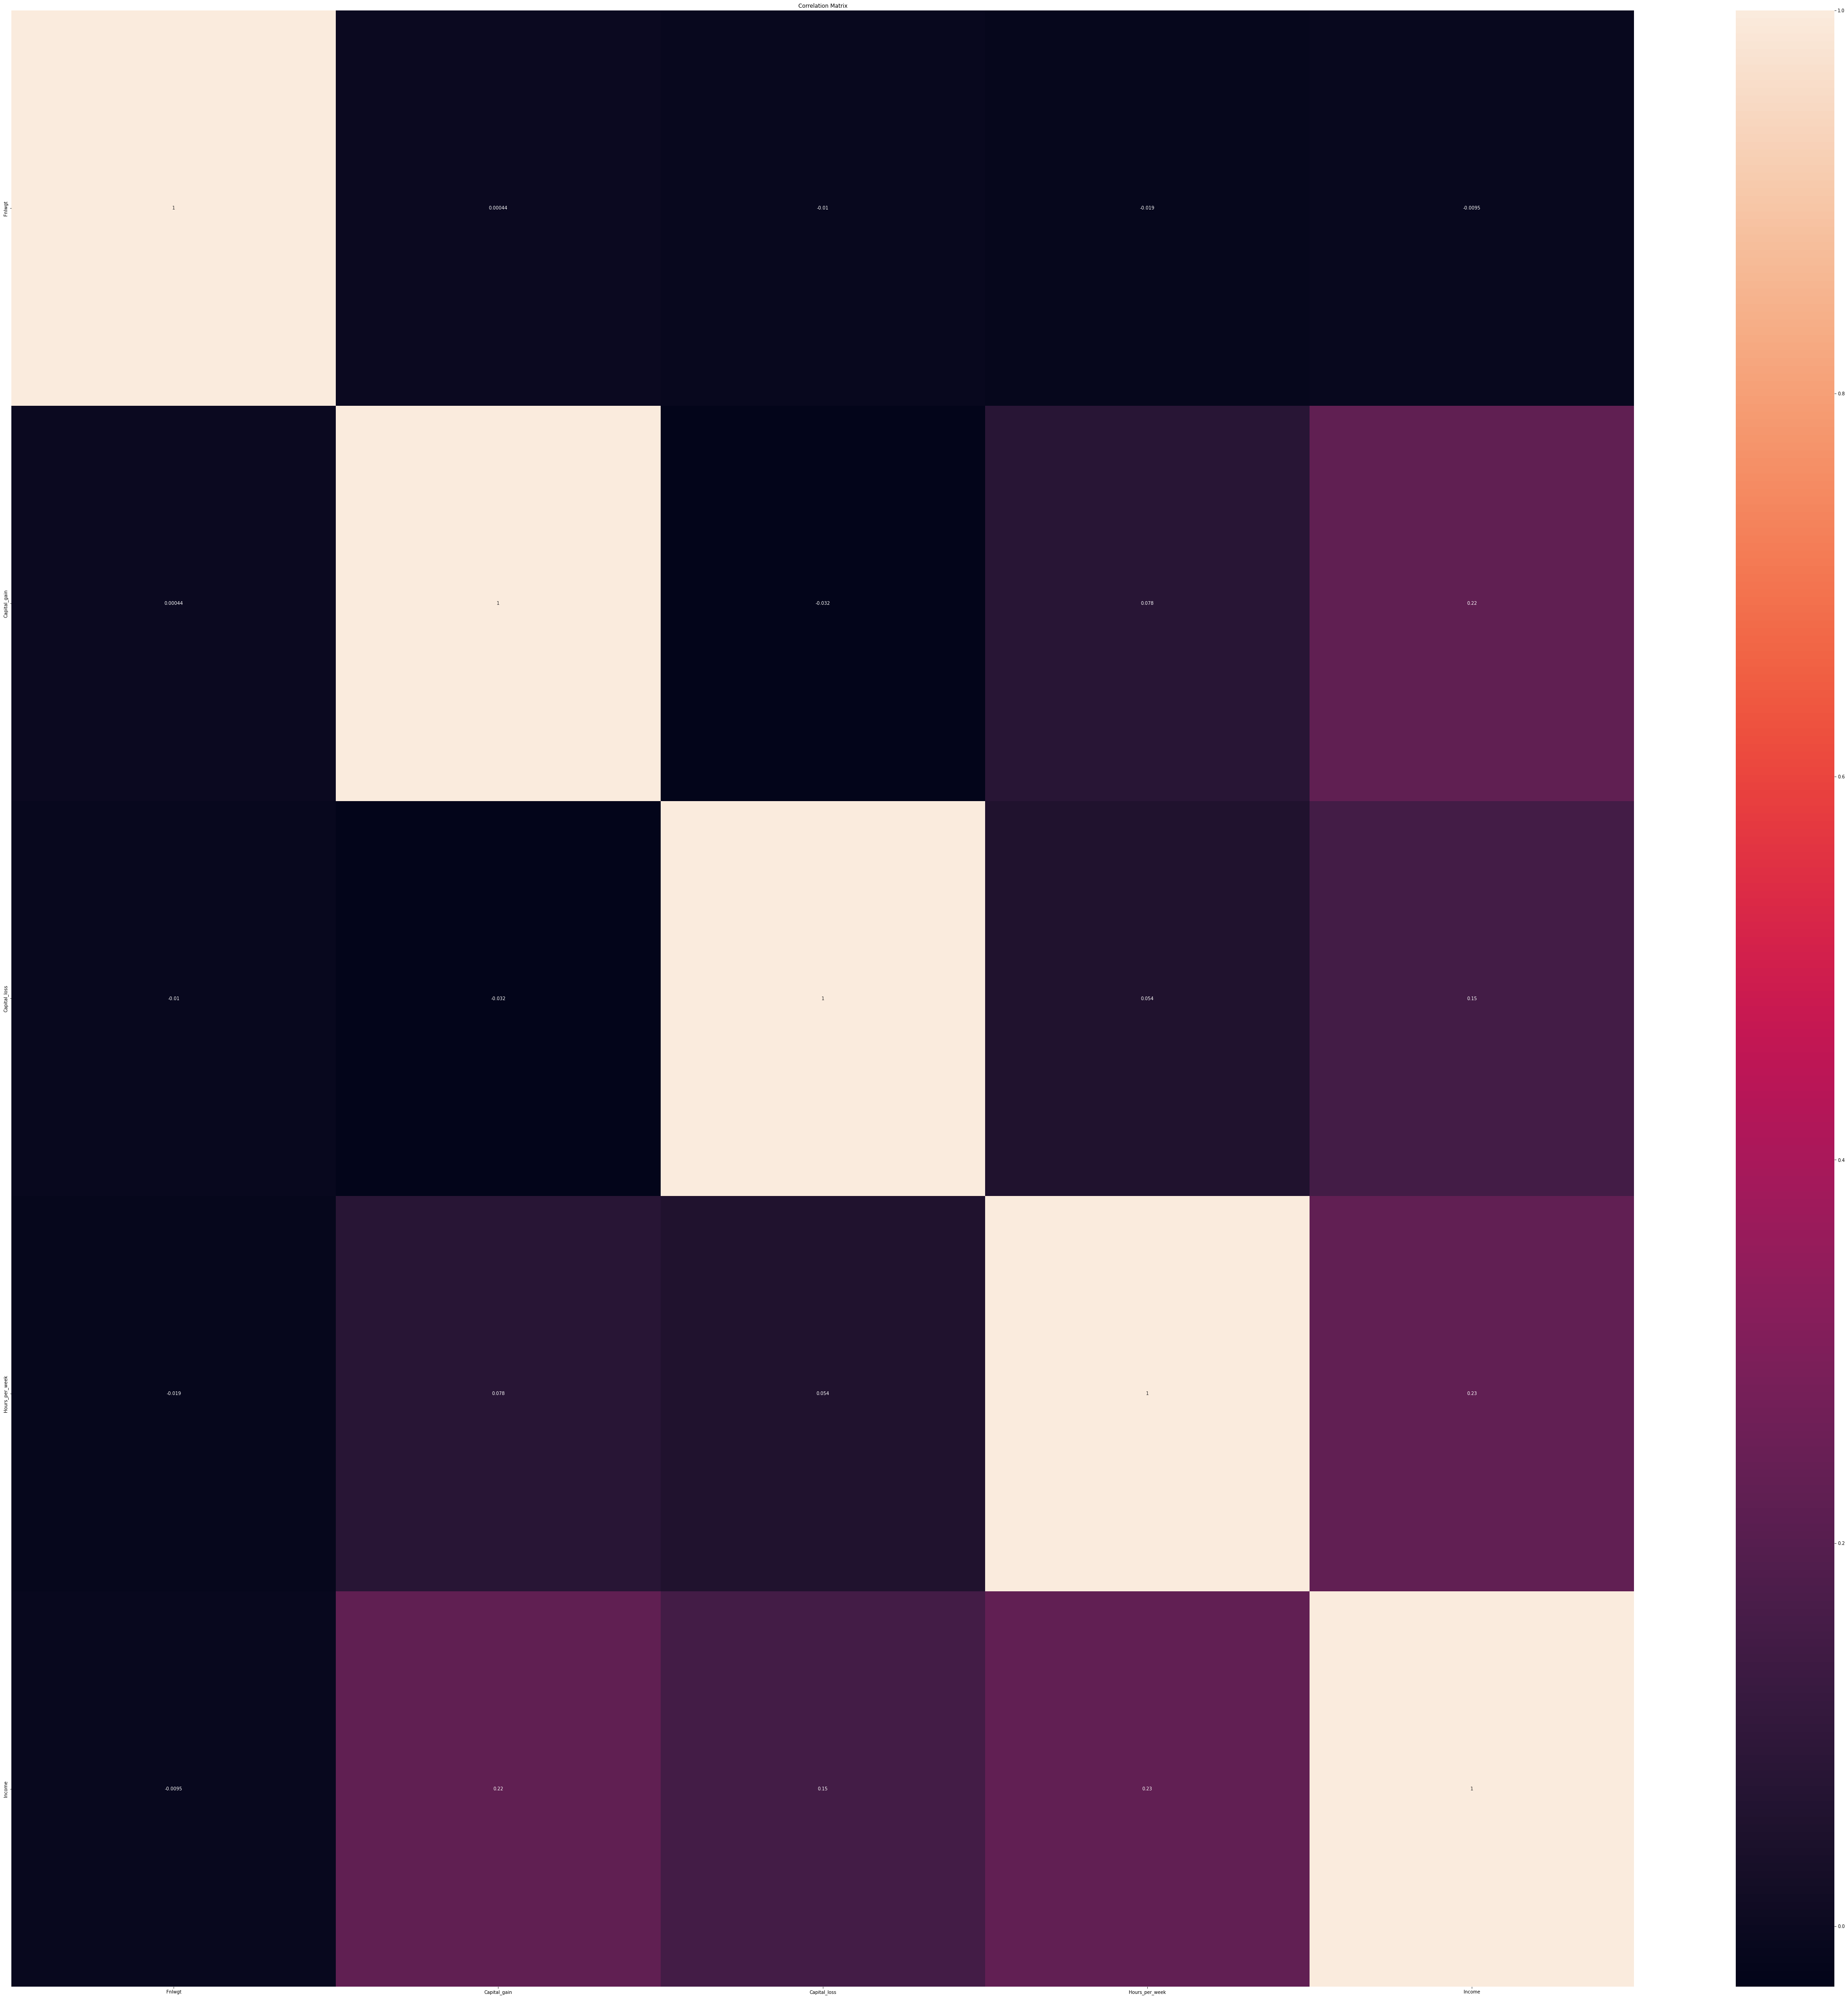

In [25]:
corr_mat=df1.corr()
# size of the canvas
plt.figure(figsize=[80,80])
# plot the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('Census Correlation_Matrix.jpg')
plt.show()

In [26]:
corr_matrix=df1.corr()
corr_matrix

,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Income
Fnlwgt,1.000000,0.000437,-0.010259,-0.018770,-0.009481
Capital_gain,0.000437,1.000000,-0.031614,0.078409,0.223333
Capital_loss,-0.010259,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,-0.018770,0.078409,0.054256,1.000000,0.229690
Income,-0.009481,0.223333,0.150523,0.229690,1.000000


In [27]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [29]:
corr_matrix=df1.corr()
corr_matrix['Income'].sort_values(ascending=False)

Income            1.000000
Hours_per_week    0.229690
Capital_gain      0.223333
Capital_loss      0.150523
Fnlwgt           -0.009481
Name: Income, dtype: float64

There is a strong positive correlation between Hours per week and income and week positive correlation
is between capital_loss and income also there is a strong negative correlation is between fnlwgt and
income

Lets Check the data distribution among the columns

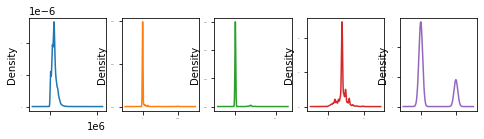

In [30]:
df1.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

We can see skewness in multiple column will handle skewness in further steps

Splitting Independent and Dependent Variables

In [31]:
x=df1.drop('Income',axis=1)
y=df1['Income']

In [32]:
# Checking Skewness
x.skew().sort_values(ascending=False)

Capital_gain      11.953690
Capital_loss       4.594549
Fnlwgt             1.446972
Hours_per_week     0.227636
dtype: float64

We can skewness in most of our column of our dataset, we will remove skewness using Power Transform
technique

In [33]:
from sklearn.preprocessing import power_transform

In [34]:
x_new=power_transform(x)

In [35]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

2    4.299511
1    3.016951
3    0.229556
0    0.016914
dtype: float64

In [36]:
type(x_new)

numpy.ndarray

In [37]:
x.columns

Index(['Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week'], dtype='object')

In [38]:
x=pd.DataFrame(x_new,columns=x.columns)

In [39]:
x

,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,-1.089889,-0.301370,-0.221213,-2.221515
1,0.398743,-0.301370,-0.221213,-0.035570
2,0.562540,-0.301370,-0.221213,-0.035570
3,1.340398,-0.301370,-0.221213,-0.035570
4,0.957182,-0.301370,-0.221213,-0.035570
...,...,...,...,...
32555,0.746749,-0.301370,-0.221213,-0.197550
32556,-0.193298,-0.301370,-0.221213,-0.035570
32557,-0.219755,-0.301370,-0.221213,-0.035570
32558,0.271668,-0.301370,-0.221213,-1.654992


In [40]:
x.skew().sort_values(ascending=False)

Capital_loss      4.299511
Capital_gain      3.016951
Hours_per_week    0.229556
Fnlwgt            0.016914
dtype: float64

In [41]:
sk=x.skew()

In [42]:
sk

Fnlwgt            0.016914
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.229556
dtype: float64

In [43]:
sk[np.abs(sk)>0.5].all()

True

In [44]:
sk[np.abs(sk)>0.5]

Capital_gain    3.016951
Capital_loss    4.299511
dtype: float64

In [45]:
x.skew()[np.abs(x.skew())<0.25].all()

True

Skewness has been removed 

# Checking Outliers

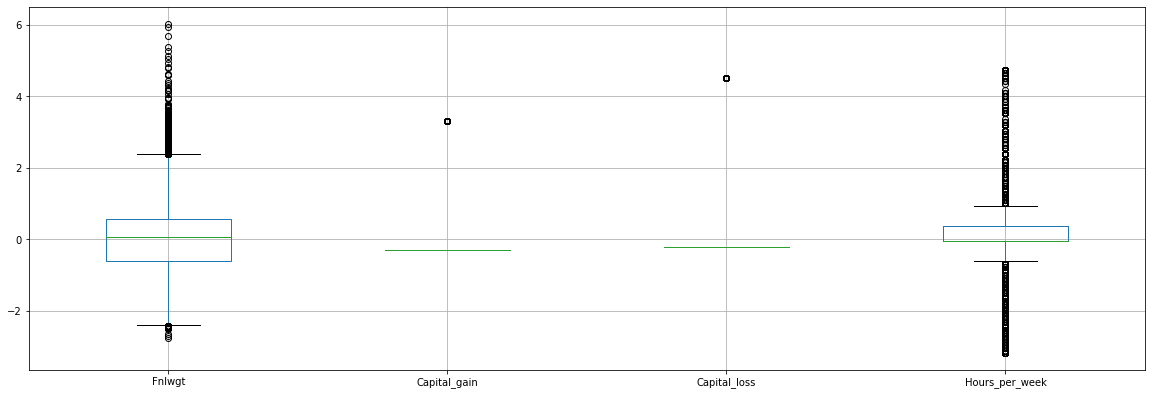

In [46]:
x.iloc[:,0:5].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [47]:
df1.columns

Index(['Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Income'], dtype='object')

In [51]:
feature=['Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']

In [52]:
def outliers(df,ft):
    q1=df[ft].quantile(0.25)
    q3=df[ft].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    ls=df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]
    return ls

In [53]:
index_list=[]
for i in feature:
    index_list.extend(outliers(df1,i))

In [54]:
index_list

[36,
 39,
 79,
 109,
 156,
 172,
 176,
 181,
 191,
 214,
 229,
 274,
 284,
 311,
 317,
 368,
 399,
 404,
 413,
 416,
 507,
 566,
 620,
 650,
 682,
 698,
 760,
 826,
 835,
 913,
 940,
 962,
 1011,
 1033,
 1150,
 1156,
 1181,
 1192,
 1235,
 1288,
 1290,
 1300,
 1313,
 1349,
 1368,
 1376,
 1435,
 1453,
 1507,
 1508,
 1543,
 1596,
 1605,
 1627,
 1653,
 1663,
 1678,
 1745,
 1796,
 1821,
 1846,
 1882,
 1894,
 1949,
 1964,
 1970,
 1978,
 1984,
 2017,
 2034,
 2064,
 2122,
 2181,
 2192,
 2265,
 2321,
 2341,
 2346,
 2356,
 2368,
 2398,
 2471,
 2513,
 2532,
 2574,
 2672,
 2674,
 2759,
 2766,
 2769,
 2771,
 2819,
 2821,
 2823,
 2849,
 2875,
 2899,
 2935,
 2941,
 2945,
 2976,
 3025,
 3149,
 3192,
 3193,
 3236,
 3257,
 3280,
 3285,
 3302,
 3375,
 3408,
 3426,
 3457,
 3476,
 3501,
 3568,
 3570,
 3611,
 3705,
 3718,
 3737,
 3743,
 3746,
 3797,
 3804,
 3807,
 3827,
 3869,
 3900,
 3902,
 3905,
 3943,
 3963,
 3982,
 4059,
 4088,
 4097,
 4106,
 4123,
 4164,
 4194,
 4240,
 4244,
 4277,
 4279,
 4299,
 4318,

In [56]:
# define a function called remove which returns a cleaned dataframe without outliers
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [57]:
df_cleaned=remove(df1,index_list)

In [58]:
df_cleaned.shape

(19766, 5)

In [59]:
x=df_cleaned.drop('Income',axis=1)
y=df_cleaned['Income']

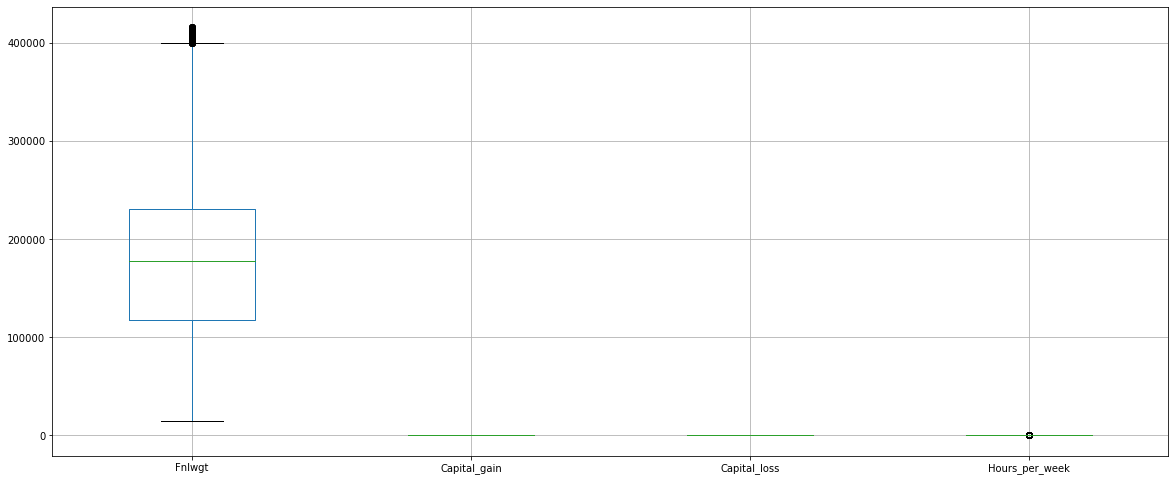

In [65]:
x.iloc[:,0:5].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.1)
plt.show()

Therefore we have removed most of the outliers

# Training Process Began

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

Best Random State

In [68]:
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print('Accuracy',acc,'random_state',i)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
        print('Accuracy',maxaccu,'Random_state',i)

Accuracy 0.7964087000505817 random_state 1
Accuracy 0.7964087000505817 Random_state 1
Accuracy 0.7910976226605969 random_state 2
Accuracy 0.7931208902377339 random_state 3
Accuracy 0.7964087000505817 random_state 4
Accuracy 0.7981790591805766 random_state 5
Accuracy 0.7981790591805766 Random_state 5
Accuracy 0.7916034395548811 random_state 6
Accuracy 0.7964087000505817 random_state 7
Accuracy 0.7984319676277187 random_state 8
Accuracy 0.7984319676277187 Random_state 8
Accuracy 0.7860394537177542 random_state 9
Accuracy 0.7969145169448659 random_state 10
Accuracy 0.7971674253920081 random_state 11
Accuracy 0.7862923621648963 random_state 12
Accuracy 0.8032372281234194 random_state 13
Accuracy 0.8032372281234194 Random_state 13
Accuracy 0.7994436014162873 random_state 14
Accuracy 0.7845220030349014 random_state 15
Accuracy 0.7918563480020233 random_state 16
Accuracy 0.7961557916034395 random_state 17
Accuracy 0.7981790591805766 random_state 18
Accuracy 0.7885685381891755 random_state 19


Accuracy 0.7928679817905918 random_state 181
Accuracy 0.8060192210419828 random_state 182
Accuracy 0.7867981790591806 random_state 183
Accuracy 0.795144157814871 random_state 184
Accuracy 0.7974203338391502 random_state 185
Accuracy 0.7921092564491654 random_state 186
Accuracy 0.7971674253920081 random_state 187
Accuracy 0.7908447142134547 random_state 188
Accuracy 0.802731411229135 random_state 189
Accuracy 0.7905918057663126 random_state 190
Accuracy 0.7900859888720283 random_state 191
Accuracy 0.8009610520991401 random_state 192
Accuracy 0.7873039959534649 random_state 193
Accuracy 0.791350531107739 random_state 194
Accuracy 0.7941325240263025 random_state 195
Accuracy 0.8050075872534143 random_state 196
Accuracy 0.7883156297420334 random_state 197
Accuracy 0.802731411229135 random_state 198
Accuracy 0.7938796155791603 random_state 199


In [69]:
print('Best accuracy is',maxaccu,'on random state',maxrs)

Best accuracy is 0.8090541224076884 on random state 109


We have found the best random state value as 109. we will create train_test_split using this random
state

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=109)

In [71]:
x_train

,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
17365,48779,0,0,40
1648,143372,0,0,40
16342,188436,0,0,48
4540,264936,0,0,40
31533,232586,0,0,50
...,...,...,...,...
26878,178431,0,0,40
27149,94809,0,0,45
13077,238638,0,0,40
32448,71556,0,0,50


In [72]:
y_train

17365    1
1648     0
16342    0
4540     0
31533    1
        ..
26878    0
27149    1
13077    0
32448    1
18935    0
Name: Income, Length: 15812, dtype: int32

In [73]:
x_test

,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
23120,105617,0,0,40
19644,174051,0,0,48
14196,201197,0,0,45
3475,304169,0,0,35
12039,326886,0,0,40
...,...,...,...,...
14852,398931,0,0,40
2202,34021,0,0,50
10331,329530,0,0,45
19824,198546,0,0,38


In [74]:
y_test

23120    0
19644    0
14196    1
3475     0
12039    0
        ..
14852    0
2202     0
10331    0
19824    0
22539    0
Name: Income, Length: 3954, dtype: int32

In [75]:
x_train.shape

(15812, 4)

In [76]:
x_test.shape

(3954, 4)

In [77]:
y_train.shape

(15812,)

In [78]:
y_test.shape

(3954,)

# Model Evaluation

1. Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 80.90541224076884
[[3199    0]
 [ 755    0]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3199
           1       0.00      0.00      0.00       755

    accuracy                           0.81      3954
   macro avg       0.40      0.50      0.45      3954
weighted avg       0.65      0.81      0.72      3954



2. Decision Tree Classifier

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred2=dt.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred2)*100)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

Accuracy 71.11785533636822
[[2623  576]
 [ 566  189]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3199
           1       0.25      0.25      0.25       755

    accuracy                           0.71      3954
   macro avg       0.53      0.54      0.53      3954
weighted avg       0.71      0.71      0.71      3954



3. Random Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred3=rf.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred3)*100)
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

Accuracy 0.7101669195751138
[[2616  583]
 [ 563  192]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3199
           1       0.25      0.25      0.25       755

    accuracy                           0.71      3954
   macro avg       0.54      0.54      0.54      3954
weighted avg       0.71      0.71      0.71      3954



Support Vector Classifier model

In [84]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred4=svc.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred4)*100)
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

Accuracy 80.90541224076884
[[3199    0]
 [ 755    0]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3199
           1       0.00      0.00      0.00       755

    accuracy                           0.81      3954
   macro avg       0.40      0.50      0.45      3954
weighted avg       0.65      0.81      0.72      3954



Cross Validation 

In [85]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=5)
print('Cross Validation Score of Logistic Regression model:',scr.mean())

Cross Validation Score of Logistic Regression model: 0.7945967802509021


In [86]:
scr2=cross_val_score(dt,x,y,cv=5)
print('Cross Validation Score of Decision Tree model:',scr2.mean())

Cross Validation Score of Decision Tree model: 0.7047962010886387


In [87]:
scr3=cross_val_score(rf,x,y,cv=5)
print('Cross Validation Score of Random Forest model:',scr3.mean())

Cross Validation Score of Random Forest model: 0.7045432158668604


In [88]:
scr4=cross_val_score(svc,x,y,cv=5)
print('Cross Validation Score of Support Vector model:',scr4.mean())

Cross Validation Score of Support Vector model: 0.7945967802509021


Logistic Regression is performing better among all the other models